In [ ]:
from Backend.GEA_api_caller import *
from Backend.GEA_classified import API_KEY
import json

from Backend.GEA_database_management import get_map_data_db
from Backend.GEA_visualizations import plot_data_for_map
from Backend.GEA_transformation_functions import analyze_individual, compile_match_data






# leaderboard = get_leaderboard_info(API_KEY, 'na')

# print(json.dumps(leaderboard, indent=4))



name = 'GEA joli'
tag = 'brrr'
queue = 'competitive'



puuid = get_puuid(name, tag, API_KEY)['data']['puuid']

# start = 25
# end = 29
# response = get_raw(puuid, API_KEY,queue, startIndex = start, endIndex = end)



# print(json.dumps(response, indent=4))



In [ ]:

joli_data = analyze_individual('GEA joli', 'brrr')
# joli_data = compile_match_data([{'name':'GEA joli','tag': 'brrr'}], set())


In [7]:
import math
import redis
import sys

# Connect to your Redis server
r = redis.Redis(host='localhost', port=6379, db=0)

# Get memory information
memory_info = r.info('memory')

# Print memory usage details
used_memory = memory_info['used_memory']
used_memory_human = memory_info['used_memory_human']

print(f"Used Memory: {used_memory} bytes")
print(f"Used Memory (Human Readable): {used_memory_human}")

# Convert bytes to appropriate unit
def convert_bytes_to_readable(size_bytes):
    if size_bytes == 0:
        return "0B"
    size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = round(size_bytes / p, 2)
    return f"{s}{size_name[i]}"

# Get all keys in the current database
keys = r.keys('*')

# Print keys, size of their corresponding values, and expiration time
for key in keys:
    value = r.get(key)
    value_size = sys.getsizeof(value) if value is not None else 0  # Get the size of the value in bytes
    expiration_time = r.ttl(key)  # Get the expiration time in seconds

    if value is not None:
        print(f"{key.decode('utf-8')}: {convert_bytes_to_readable(value_size)}, Expiration Time: {expiration_time} seconds")
    else:
        print(f"{key.decode('utf-8')}: None, Expiration Time: {expiration_time} seconds")

Used Memory: 74294520 bytes
Used Memory (Human Readable): 70.85M
flask_cache_5754e4d5-ca03-48e0-9adb-1be7964be815: 9.1MB, Expiration Time: 1014 seconds
flask_cache_0a827dd4-f1dd-4440-ab88-9c2cde078d9d: 9.1MB, Expiration Time: 133 seconds
flask_cache_02a7354f-4942-47e7-9f84-814f01153ccb: 9.1MB, Expiration Time: 694 seconds
flask_cache_6e11ea29-f59d-45b1-8e4b-7694f3c0ea65: 9.57MB, Expiration Time: 3377 seconds
flask_cache_8b7dfa8f-6d49-4baf-8ade-70c1415a5356: 8.98MB, Expiration Time: 1180 seconds
flask_cache_02edbcfa-7539-4909-889b-ab681cd4bdca: 9.06MB, Expiration Time: 3540 seconds
flask_cache_dce9c603-d113-4310-b902-b21976002ea9: 9.1MB, Expiration Time: 378 seconds


In [3]:

import uuid


print(str(uuid.uuid4()))

cf513a68-b51b-4aa7-aa4b-b683a5db2a66


In [2]:
import pickle
from Backend.GEA_visualizations import *

def is_serializable(obj):
    try:
        pickle.dumps(obj)
        return True
    except (pickle.PicklingError, TypeError):
        return False

# Example usage
map_plotter = Map_Plotter('leaderboard_data_GEA', 'Ascent')
if is_serializable(map_plotter):
    print("map_plotter is serializable.")
else:
    print("map_plotter is not serializable.")

map_plotter is serializable.


In [6]:
from Backend.GEA_visualizations import *

curr_map = Map_Plotter('leaderboard_data_GEA', 'Ascent')


def buy_values(buy_name: str):
    if(buy_name == 'pistol'):
        return 0,1000
    elif(buy_name == 'rifle'):
        return 3900, 5000
    elif(buy_name == 'all'):
        return 0, 7950
    elif(buy_name == 'fullbuy'):
        return 3600, 7950
    elif(buy_name == 'midbuy'):
        return 1000, 3900
    elif(buy_name == 'eco'):
        return 0, 3000
    

a_lower, a_upper = buy_values('rifle') #ATTACKERS BUY

d_lower, d_upper = buy_values('rifle') #DEFENDERS BUY


attack_options = {
    "kills": {"lower": a_lower//50, "upper": a_upper//50}, #between 0 160 
    "deaths": {"lower": a_lower//50, "upper": a_upper//50}                  #note: MAKE KILLS AND DEATHS OPTIONS THE SAME(physically)

}
defense_options = {
    "kills": {"lower": d_lower//50, "upper": d_upper//50}, #between 0 160
    "deaths": {"lower": d_lower//50, "upper":d_upper//50}
}


attack = False
defense = True

print(curr_map)

curr_map.update_buy_range_attack(attack_options)
curr_map.update_buy_range_defense(defense_options)


kills_bin = curr_map.generate_kills_bin(attack = attack,defense = defense)
deaths_bin = curr_map.generate_deaths_bin(attack = attack,defense = defense)

kills_heatmap_image = curr_map.create_plot(kills_bin,attack = attack,defense = defense,kill = True,death = False, log_scale=True, filter_sigma=2)
deaths_heatmap_image  = curr_map.create_plot(deaths_bin,attack = attack,defense = defense,kill = False,death = True, log_scale=True, filter_sigma=2)

combined = kills_bin + deaths_bin
combined_heatmap_image = curr_map.create_plot(combined,attack = attack,defense = defense,kill = True,death = True, log_scale=True, filter_sigma=2)




Map Name: Ascent, Number of Matches: 219


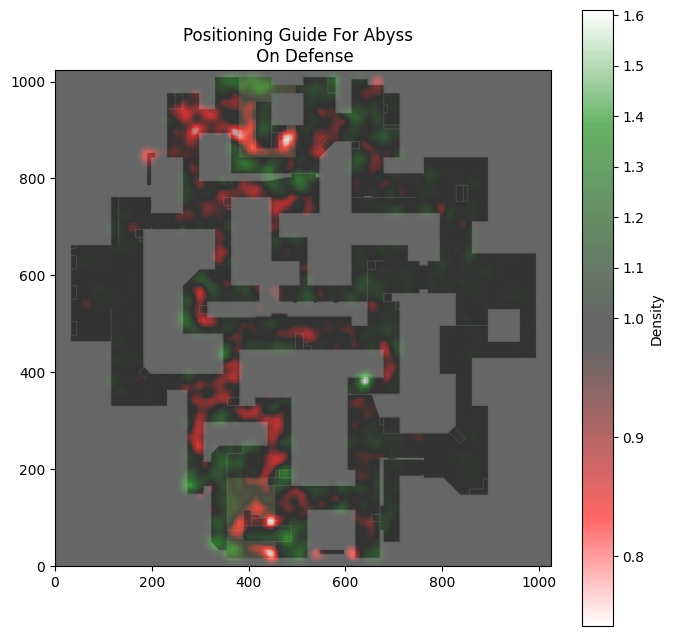

<Figure size 640x480 with 0 Axes>

In [13]:
pos_guide = curr_map.create_positioning_guide(kills_bin,deaths_bin, attack = attack, defense = defense, filter_sigma= 2.5)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Example data points
data = np.random.randn(1000000, 2)

# Define the grid size
x_bins = np.linspace(-3, 3, 200)
y_bins = np.linspace(-3, 3, 200)

# Compute the histogram
heatmap, xedges, yedges = np.histogram2d(data[:,0], data[:,1], bins=(x_bins, y_bins))
heatmap = gaussian_filter(heatmap, sigma=0)
# Plot the heatmap
plt.imshow(heatmap.T, extent=[x_bins.min(), x_bins.max(), y_bins.min(), y_bins.max()], origin='lower')
plt.colorbar()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy.stats import gaussian_kde

# Generate random sample data
np.random.seed(0)
data = np.random.randn(10000, 2)

# Adjustable parameters
grid_size = 400  # Number of bins along each axis
x_min, x_max = -3, 3  # Horizontal range of data
y_min, y_max = -3, 3  # Vertical range of data
normalize = False  # Whether to normalize the histogram values
use_log_scale = True  # Whether to use logarithmic scale
cmap_choice = 'inferno'  # Colormap for the heatmap
interpolation_method = 'nearest'  # Interpolation method ('none', 'nearest', 'bilinear', etc.)
apply_gaussian_filter = True  # Whether to apply Gaussian smoothing
sigma = 4  # Standard deviation for Gaussian kernel

# Binning (Histogram Method)
start_time = time.time()
x_bins = np.linspace(x_min, x_max, grid_size)
y_bins = np.linspace(y_min, y_max, grid_size)
heatmap_hist, _, _ = np.histogram2d(data[:, 0], data[:, 1], bins=(x_bins, y_bins))

# Apply normalization if selected
if normalize:
    heatmap_hist = heatmap_hist / heatmap_hist.max()

# Apply logarithmic scale if selected
if use_log_scale:
    heatmap_hist = np.log1p(heatmap_hist)  # log1p is used to avoid log(0) issues

# Apply Gaussian filtering if selected
if apply_gaussian_filter:
    heatmap_hist = gaussian_filter(heatmap_hist, sigma=sigma)

end_time = time.time()
histogram_time = end_time - start_time

# Kernel Density Estimation (KDE)
start_time = time.time()
kde = gaussian_kde(data.T, bw_method=0.1)
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, grid_size), np.linspace(y_min, y_max, grid_size))
z_kde = kde(np.vstack([x_grid.ravel(), y_grid.ravel()])).reshape(x_grid.shape)
end_time = time.time()
kde_time = end_time - start_time

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(heatmap_hist.T, extent=[x_min, x_max, y_min, y_max], origin='lower')
ax[0].set_title(f'Histogram Method (Time: {histogram_time:.4f}s)')

im = ax[1].imshow(z_kde, extent=[x_min, x_max, y_min, y_max], origin='lower')
ax[1].set_title(f'KDE (Time: {kde_time:.4f}s)')

fig.suptitle(f"Heatmap Generation Methods for {len(data)} Datapoints", fontsize=16)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Generate random sample data
np.random.seed(0)
data = np.random.randn(100000, 2)

# Adjustable parameters
grid_size = 400  # Number of bins along each axis
x_min, x_max = -3, 3  # Horizontal range of data
y_min, y_max = -3, 3  # Vertical range of data
normalize = False  # Whether to normalize the histogram values
use_log_scale = True  # Whether to use logarithmic scale
cmap_choice = 'viridis'  # Colormap for the heatmap
interpolation_method = 'nearest'  # Interpolation method ('none', 'nearest', 'bilinear', etc.)
apply_gaussian_filter = True  # Whether to apply Gaussian smoothing
sigma = 3  # Standard deviation for Gaussian kernel

# Binning (Histogram Method)
x_bins = np.linspace(x_min, x_max, grid_size)
y_bins = np.linspace(y_min, y_max, grid_size)
heatmap_hist, _, _ = np.histogram2d(data[:, 0], data[:, 1], bins=(x_bins, y_bins))

# Apply normalization if selected
if normalize:
    heatmap_hist = heatmap_hist / heatmap_hist.max()

# Apply logarithmic scale if selected
if use_log_scale:
    heatmap_hist = np.log1p(heatmap_hist)  # log1p is used to avoid log(0) issues

# Apply Gaussian filtering if selected
if apply_gaussian_filter:
    heatmap_hist = gaussian_filter(heatmap_hist, sigma=sigma)

# Plotting the heatmap
plt.imshow(heatmap_hist.T, extent=[x_min, x_max, y_min, y_max], origin='lower',
           cmap=cmap_choice, interpolation=interpolation_method)
plt.colorbar(label='Density')  # Add colorbar with label
# plt.title('Heatmap Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
